<a href="https://colab.research.google.com/github/capitallatera/Project_1/blob/master/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

Classification.ipynb  dataset_1.xlsx  final_dataset.csv    Model_1-Copy3.ipynb
combined.csv          dataset_2.xlsx  final_dataset.xlsx   Model_1.ipynb
combined.xlsx         dataset_3.xlsx  Model_1-Copy1.ipynb  model.pkl
Concatenate.ipynb     EDA.ipynb       Model_1-Copy2.ipynb


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_excel("final_dataset.xlsx")

In [ ]:
df=data

In [ ]:
df_1=df.drop(columns=["Unnamed: 0"])

In [ ]:
df_1.head()

,Content,Category
0,",""While receiving an international call, if an...",OTP
1,",Non-violence is the greatest force at the dis...",OTP
2,",""इस गांधी जयंतीआइए, बापू को समर्पित करें एक स...",OTP
3,",To call woman the weaker sex is a libel; it i...",OTP
4,",""I attach the highest importance to quality, ...",OTP


In [ ]:
df[df["Content"]==0]

,Unnamed: 0,Content,Category
9716,9716,0,Spam


In [ ]:
df=df.drop([9716])

### Remove punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Function to remove Punctuation
def remove_punct(text):
    if text != 0:
        text_nopunct="".join([char for char in text if char not in string.punctuation])
        return text_nopunct
df["Content_clean"]=df["Content"].apply(lambda x: remove_punct(x))
df.head()

,Unnamed: 0,Content,Category,Content_clean
0,0,",""While receiving an international call, if an...",OTP,While receiving an international call if an In...
1,1,",Non-violence is the greatest force at the dis...",OTP,Nonviolence is the greatest force at the dispo...
2,2,",""इस गांधी जयंतीआइए, बापू को समर्पित करें एक स...",OTP,इस गांधी जयंतीआइए बापू को समर्पित करें एक स्वच...
3,3,",To call woman the weaker sex is a libel; it i...",OTP,To call woman the weaker sex is a libel it is ...
4,4,",""I attach the highest importance to quality, ...",OTP,I attach the highest importance to quality irr...


### Tokenization

In [ ]:
import re

# Function to Tokenize Words
def tokenize(text):
    if text != None:
        tokens=re.split('\W+',text.lower())
        return tokens


In [ ]:
df["Content_tokenize"]=df["Content_clean"].apply(lambda x: tokenize(x))
df.head(3)

,Unnamed: 0,Content,Category,Content_clean,Content_tokenize
0,0,",""While receiving an international call, if an...",OTP,While receiving an international call if an In...,"[while, receiving, an, international, call, if..."
1,1,",Non-violence is the greatest force at the dis...",OTP,Nonviolence is the greatest force at the dispo...,"[nonviolence, is, the, greatest, force, at, th..."
2,2,",""इस गांधी जयंतीआइए, बापू को समर्पित करें एक स...",OTP,इस गांधी जयंतीआइए बापू को समर्पित करें एक स्वच...,"[इस, ग, ध, जय, त, आइए, ब, प, क, समर, प, त, कर,..."


### Preprocessing Data: Using Stemming

In [ ]:
import nltk
ps=nltk.PorterStemmer()

def stemming(tokenized_text):
    if tokenized_text != None:
        text=[ps.stem(word) for word in tokenized_text]
        return text

df["Content_stem"]=df["Content_tokenize"].apply(lambda x:stemming(x))
df.head(3)

,Unnamed: 0,Content,Category,Content_clean,Content_tokenize,Content_stem
0,0,",""While receiving an international call, if an...",OTP,While receiving an international call if an In...,"[while, receiving, an, international, call, if...","[while, receiv, an, intern, call, if, an, indi..."
1,1,",Non-violence is the greatest force at the dis...",OTP,Nonviolence is the greatest force at the dispo...,"[nonviolence, is, the, greatest, force, at, th...","[nonviol, is, the, greatest, forc, at, the, di..."
2,2,",""इस गांधी जयंतीआइए, बापू को समर्पित करें एक स...",OTP,इस गांधी जयंतीआइए बापू को समर्पित करें एक स्वच...,"[इस, ग, ध, जय, त, आइए, ब, प, क, समर, प, त, कर,...","[इस, ग, ध, जय, त, आइए, ब, प, क, समर, प, त, कर,..."


### Preprocessing Data: Using a Lemmatizer

In [ ]:
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    if tokenized_text != None:
        text=[wn.lemmatize(word) for word in tokenized_text]
        return text

df["Content_lemmatized"]=df["Content_tokenize"].apply(lambda x: lemmatizing(x))
df.head(3)

,Unnamed: 0,Content,Category,Content_clean,Content_tokenize,Content_stem,Content_lemmatized
0,0,",""While receiving an international call, if an...",OTP,While receiving an international call if an In...,"[while, receiving, an, international, call, if...","[while, receiv, an, intern, call, if, an, indi...","[while, receiving, an, international, call, if..."
1,1,",Non-violence is the greatest force at the dis...",OTP,Nonviolence is the greatest force at the dispo...,"[nonviolence, is, the, greatest, force, at, th...","[nonviol, is, the, greatest, forc, at, the, di...","[nonviolence, is, the, greatest, force, at, th..."
2,2,",""इस गांधी जयंतीआइए, बापू को समर्पित करें एक स...",OTP,इस गांधी जयंतीआइए बापू को समर्पित करें एक स्वच...,"[इस, ग, ध, जय, त, आइए, ब, प, क, समर, प, त, कर,...","[इस, ग, ध, जय, त, आइए, ब, प, क, समर, प, त, कर,...","[इस, ग, ध, जय, त, आइए, ब, प, क, समर, प, त, कर,..."


In [ ]:
df.isna().sum()

Unnamed: 0            0
Content               0
Category              0
Content_clean         0
Content_tokenize      0
Content_stem          0
Content_lemmatized    0
dtype: int64

In [ ]:
### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df['Content_clean'],df["Category"],test_size=0.3)

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(X_train)
# print(vectorizer.get_feature_names())
X.shape

(6909, 8115)

In [ ]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[   7,    0,    5,    0,    2],
       [   0, 2021,    2,    1,    1],
       [   1,   17,  351,   22,   15],
       [   0,   14,   41,   58,    2],
       [   1,    3,   26,    6,  365]])

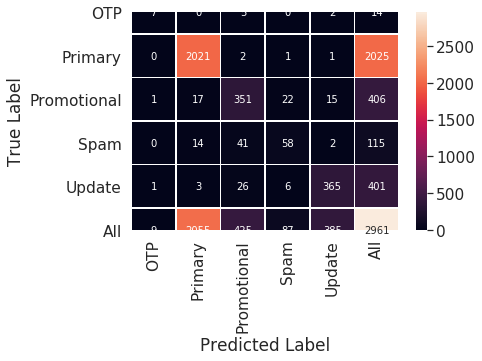

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True Label'], colnames=['Predicted Label'], margins = True)
sns.heatmap(confusion_matrix,linewidths=.5, annot=True,square=False,fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         OTP       0.78      0.50      0.61        14
     Primary       0.98      1.00      0.99      2025
 Promotional       0.83      0.86      0.84       406
        Spam       0.67      0.50      0.57       115
      Update       0.95      0.91      0.93       401

    accuracy                           0.95      2961
   macro avg       0.84      0.76      0.79      2961
weighted avg       0.94      0.95      0.94      2961



In [ ]:
accuracy_score(y_test,y_pred)

0.9463019250253293

In [ ]:
df["Content"][100]

',"Your 9646345471 Expiry is due on 07/07/19. Why wait till expiry, Recharge with All-Rounder Pack & get remaining validity + new Pack validity.Dial *121# for more'

In [ ]:
clf.predict([df["Content"][100]])

array(['Update'], dtype=object)

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))